In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz')

In [6]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis([b for b in lepping_db.all() if b.task not in ['response', 'tones']], mask='/home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz', num_factors=100)

01/31/2020 12:56:19 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run3_music_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/31/2020 12:56:21 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run2_music_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/31/2020 12:56:22 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/31/2020 12:56:24 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run5_nonmusic_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sou

In [7]:
losses = htfa.train(num_steps=1500, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=50, blocks_batch_size=12,
                    blocks_filter=lepping_db.inference_filter(training=True))

01/31/2020 13:01:12 [Epoch 1] (10160ms) Posterior free-energy 7.63527360e+08
01/31/2020 13:01:12 Saving checkpoint...
01/31/2020 13:01:22 [Epoch 2] (9681ms) Posterior free-energy 7.32739008e+08
01/31/2020 13:01:32 [Epoch 3] (9576ms) Posterior free-energy 7.02218368e+08
01/31/2020 13:01:41 [Epoch 4] (9539ms) Posterior free-energy 6.88960192e+08
01/31/2020 13:01:51 [Epoch 5] (9626ms) Posterior free-energy 6.67013696e+08
01/31/2020 13:02:01 [Epoch 6] (9844ms) Posterior free-energy 6.53603648e+08
01/31/2020 13:02:11 [Epoch 7] (9800ms) Posterior free-energy 6.39647680e+08
01/31/2020 13:02:20 [Epoch 8] (9755ms) Posterior free-energy 6.24922688e+08
01/31/2020 13:02:30 [Epoch 9] (9646ms) Posterior free-energy 6.12287744e+08
01/31/2020 13:02:40 [Epoch 10] (9973ms) Posterior free-energy 6.07357120e+08
01/31/2020 13:02:50 [Epoch 11] (10051ms) Posterior free-energy 5.98147968e+08
01/31/2020 13:03:00 [Epoch 12] (9640ms) Posterior free-energy 5.91814912e+08
01/31/2020 13:03:10 [Epoch 13] (9898ms) Po

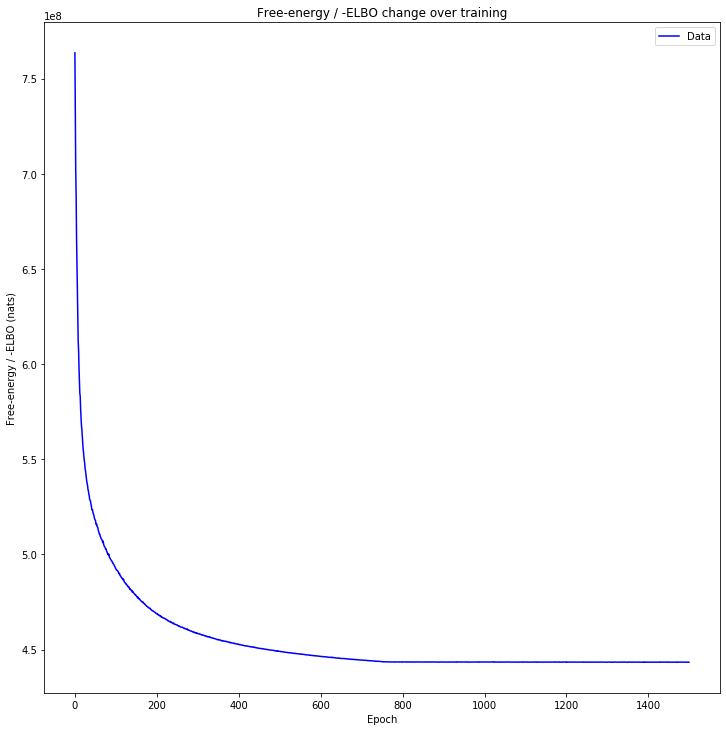

In [8]:
utils.plot_losses(losses)

In [9]:
import re

In [10]:
def subject_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [11]:
def task_labeler(task):
    if task == 'negative_music':
        task = 'Negative music'
    elif task == 'positive_music':
        task = 'Positive music'
    else:
        task = task.capitalize()
    return task

In [12]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block.subject)
    task = task_labeler(block.task)
    return subject + ', ' + task + ' stimulus'

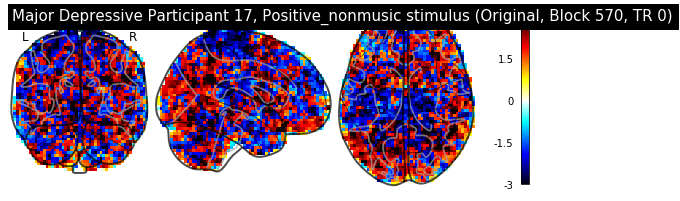

01/31/2020 17:00:27 Reconstruction Error (Frobenius Norm): 8.42692810e+02 out of 8.24468628e+02


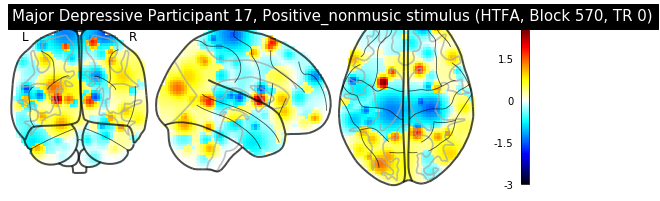

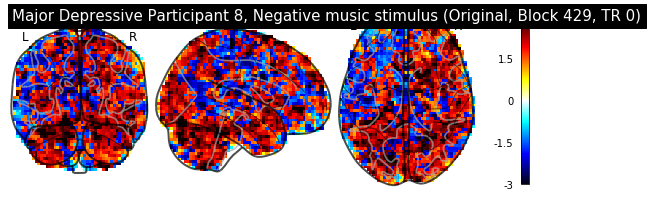

01/31/2020 17:00:30 Reconstruction Error (Frobenius Norm): 1.00422498e+03 out of 9.41776245e+02


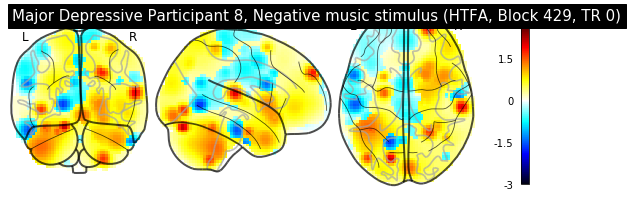

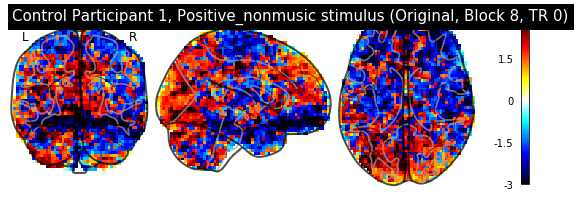

01/31/2020 17:00:33 Reconstruction Error (Frobenius Norm): 8.34623779e+02 out of 7.62909424e+02


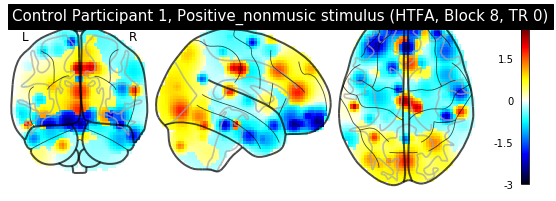

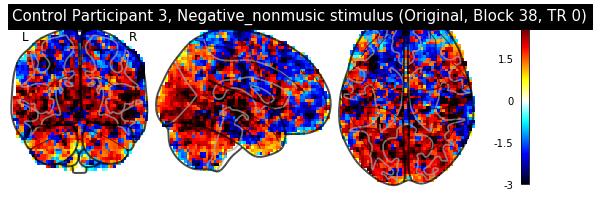

01/31/2020 17:00:36 Reconstruction Error (Frobenius Norm): 8.70198547e+02 out of 8.08979126e+02


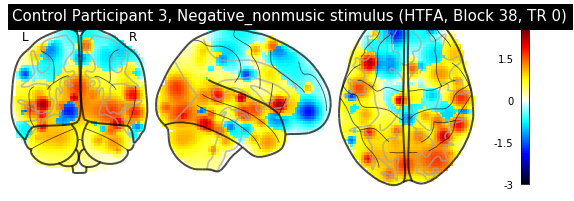

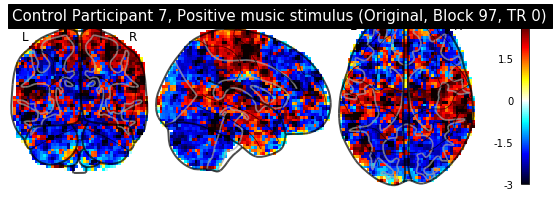

01/31/2020 17:00:39 Reconstruction Error (Frobenius Norm): 8.85485229e+02 out of 7.46169617e+02


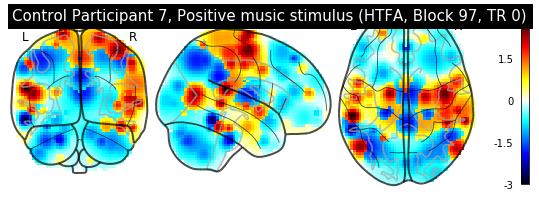

In [13]:
for b in np.random.choice(range(htfa.num_blocks), 5):
    htfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    htfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

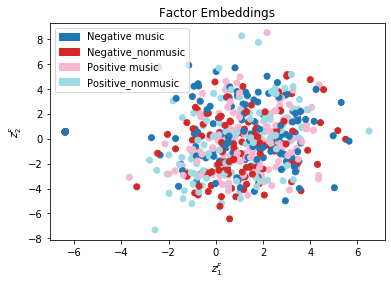

In [14]:
#factor 'embeddings' with PCA
htfa.scatter_factor_embedding(labeler=lambda block: task_labeler(block.task), embedding='PCA')

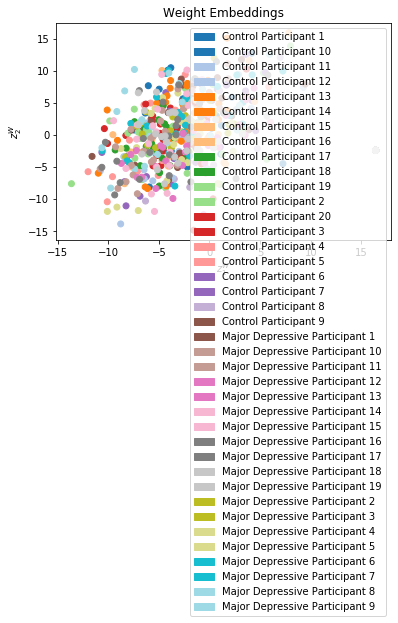

In [15]:
#weight 'embeddings' with PCA
htfa.scatter_weight_embedding(labeler=lambda block: subject_labeler(block.subject), embedding='PCA')

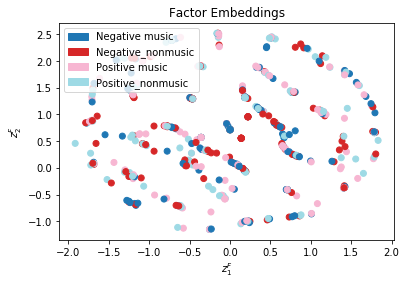

In [16]:
#factor 'embeddings' with TSNE
htfa.scatter_factor_embedding(labeler=lambda block: task_labeler(block.task), embedding='TSNE')

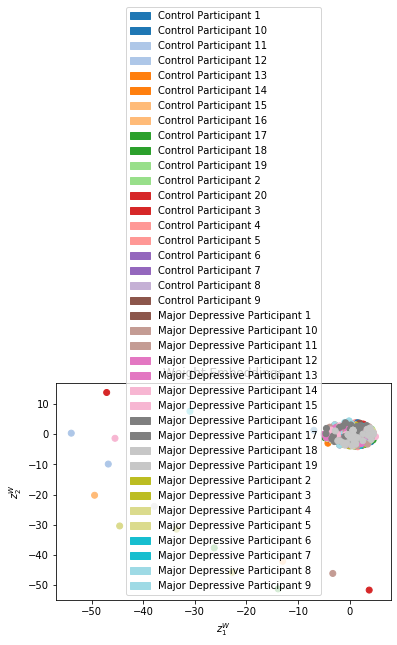

In [17]:
#weight 'embeddings' with TSNE
htfa.scatter_weight_embedding(labeler=lambda block: subject_labeler(block.subject), embedding='TSNE')

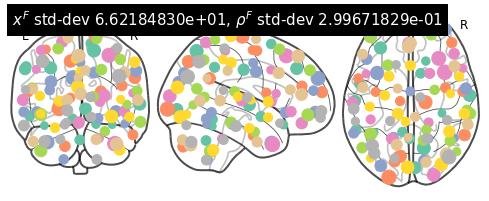

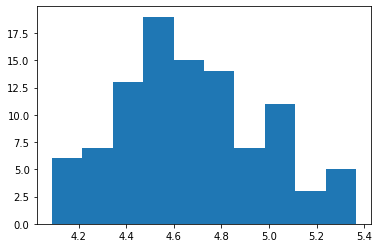

(<nilearn.plotting.displays.OrthoProjector at 0x7f9010af59d0>,
 tensor([[ 14.5007, -66.7100,  57.9462],
         [ 16.6251,  24.7957, -19.6343],
         [ -8.0096, -49.8478, -13.8369],
         [ 11.1337,  11.8504,  65.3605],
         [-58.0341, -17.1438,  38.3438],
         [ 62.6515, -11.2628,   1.6369],
         [-53.0204,   0.9487, -10.8730],
         [  5.5152, -87.4126,  -3.4843],
         [-56.8414, -47.8061,  40.8752],
         [-37.6443, -50.1269, -21.0947],
         [-30.9905,  38.6442,  39.5762],
         [ 33.6491, -30.0444, -20.0307],
         [ -0.4825, -56.7976, -36.2101],
         [ 43.9394,  44.1204,  20.9755],
         [-10.2625, -75.2681,  46.7469],
         [ 57.4156, -52.9891,  29.2358],
         [ 55.5212,  -7.2150, -30.8342],
         [-10.4437, -17.3275,   8.2303],
         [-36.1628,  -7.7534,  59.0004],
         [ 16.2128, -18.5735,  73.2136],
         [-16.0509, -80.9572, -42.7703],
         [ 21.7913,  65.1756,  14.6732],
         [-54.3349,   6.5993,  14.1

In [18]:
htfa.visualize_factor_template()

In [19]:
htfa.average_reconstruction_error(weighted=False, blocks_filter=lepping_db.inference_filter(training=True))

01/31/2020 17:01:17 Average reconstruction error (MSE): 7.04410682e+02 +/- 4.60939514e+01
01/31/2020 17:01:17 Average data norm (Euclidean): 8.28917953e+02 +/- 5.39972860e+01
01/31/2020 17:01:17 Percent average reconstruction error: 85.107410 +/- 4.72803554e+00


(array([734.18792725, 717.97967529, 657.45397949, 735.11090088,
        684.8526001 , 692.9942627 , 734.18719482, 706.0213623 ,
        639.28619385, 633.79699707, 648.41802979, 643.0614624 ,
        675.36975098, 724.49035645, 695.6854248 , 689.44952393,
        663.32312012, 693.40875244, 673.19506836, 686.40655518,
        732.95654297, 740.85430908, 751.0447998 , 742.91467285,
        707.90185547, 725.86065674, 718.48950195, 707.94299316,
        690.43963623, 759.54119873, 712.09625244, 739.25506592,
        677.24664307, 693.67785645, 685.62628174, 680.05944824,
        645.43164062, 647.559021  , 648.40515137, 605.57678223,
        723.90484619, 714.35021973, 720.19036865, 733.35540771,
        727.20214844, 725.31524658, 733.15264893, 713.88867188,
        742.20214844, 757.54217529, 761.5758667 , 773.73913574,
        751.71307373, 754.95825195, 745.09594727, 726.96075439,
        793.85235596, 784.49273682, 764.15197754, 720.65411377,
        743.01922607, 740.99023438, 711.

In [20]:
htfa.free_energy(batch_size=50, use_cuda=True, blocks_batch_size=15, num_particles=1, sample_size=100,
                 blocks_filter=lepping_db.inference_filter(training=True))

[[448870144.0, -440660384.0, 8209846.0],
 [448935456.0, -440564000.0, 8212105.5]]

In [21]:
htfa.free_energy(batch_size=50, use_cuda=True, blocks_batch_size=15, num_particles=1, sample_size=100,
                 blocks_filter=lepping_db.inference_filter(training=False))

[[146480688.0, -145283024.0, 1197659.75],
 [150330368.0, -141365872.0, 1198871.25]]